# Test with synthetic target and test

In [ ]:
import numpy as np
np.random.seed(42)
sub_chain =  np.random.randn(5,10)
print(sub_chain.shape)
print(sub_chain)

train = sub_chain[0:sub_chain.shape[0]-1,:]
target = sub_chain[1:sub_chain.shape[0],:]
print(target.shape)
print(train.shape)


(5, 10)
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783 -0.56228753
  -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259
  -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223  0.34361829 -1.76304016]]
(4, 10)
(4, 10)


# Main Code

## mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the np objects

In [ ]:
import numpy as np
train = np.load('/content/drive/MyDrive/train and target/train_data.npy')
target = np.load('/content/drive/MyDrive/train and target/target_data.npy')


In [ ]:
print(train)
print(target)

[[36 29 25 22 19 20 21 21 32 35]
 [32 31 26 24 20 19 24 23 31 36]
 [35 36 32 28 25 23 26 26 35 43]
 [44 44 38 33 28 26 29 32 40 56]]
[[32 31 26 24 20 19 24 23 31 36]
 [35 36 32 28 25 23 26 26 35 43]
 [44 44 38 33 28 26 29 32 40 56]
 [53 53 46 40 34 33 35 40 45 68]]


In [ ]:
print(train[0:3,:])
print(target[0:3,:])
print(target.shape)
test_tr = train[3,:]
test_ta = target[3,:]
print(test)
train = train[0:3,:]
target = target[0:3,:]




[[36 29 25 22 19 20 21 21 32 35]
 [32 31 26 24 20 19 24 23 31 36]
 [35 36 32 28 25 23 26 26 35 43]]
[[32 31 26 24 20 19 24 23 31 36]
 [35 36 32 28 25 23 26 26 35 43]
 [44 44 38 33 28 26 29 32 40 56]]
(4, 10)
[53 53 46 40 34 33 35 40 45 68]


## Run MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math

# Convert data to PyTorch tensors
train_tensor = torch.tensor(train, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)
# test_tensor = torch.tensor(test_tr, dtype=torch.float32)
# test_target = torch.tensor(test_ta,dtype=torch.float32)
# Define an MLP with two hidden layers
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) # First layer
    self.relu = nn.ReLU() # relu activation function
    self.fc2 = nn.Linear(hidden_size, output_size) # Second layer

  # Forward is equivalent to the first equation in the paper
  def forward(self, x):
    x = self.fc1(x) # we take the output of layer 1 (fc1)
    x = self.relu(x) # run the output through the relu activation
    x = self.fc2(x) # then run that throught the last layer
    return x

# Create the model
# For this model we are going from 1-dim space to 64-dim space in the first layer
# then going from 64-dim space back down to 1-dim space
input_size = 10
hidden_size = 64
output_size = 10
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 3000
for epoch in range(num_epochs):
  # flush the gradient
  optimizer.zero_grad()
  # Forward pass
  outputs = model(train_tensor)
  loss = torch.sqrt(criterion(outputs, target_tensor))#Frida Changed this to make it RMSE

  # Backward pass and optimization


  # calculate the loss
  loss.backward()
  # optimize the params based off the loss
  optimizer.step()

  # Print the loss
  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the trained model
model.eval()
# Use torch.no_grad() because there is no need to use gradient for test
# can turn back to training mode with gradient computations by running model.train()
with torch.no_grad():
  # test_input = train_tensor
  test_input = train_tensor
  predictions = model(test_input)

print(predictions.numpy().shape)
print(predictions.numpy())
loss = torch.sqrt(criterion(predictions, target_tensor))
print(loss.item())


Epoch [100/3000], Loss: 2.135737657546997
Epoch [200/3000], Loss: 1.8953731060028076
Epoch [300/3000], Loss: 1.597625732421875
Epoch [400/3000], Loss: 1.227690577507019
Epoch [500/3000], Loss: 0.8569291234016418
Epoch [600/3000], Loss: 0.6214026808738708
Epoch [700/3000], Loss: 0.5082456469535828
Epoch [800/3000], Loss: 0.3945564031600952
Epoch [900/3000], Loss: 0.27336806058883667
Epoch [1000/3000], Loss: 0.1743352711200714
Epoch [1100/3000], Loss: 0.10687209665775299
Epoch [1200/3000], Loss: 0.0711875632405281
Epoch [1300/3000], Loss: 0.05585667863488197
Epoch [1400/3000], Loss: 0.08724668622016907
Epoch [1500/3000], Loss: 0.07332246750593185
Epoch [1600/3000], Loss: 0.0845561996102333
Epoch [1700/3000], Loss: 0.08859071135520935
Epoch [1800/3000], Loss: 0.06777725368738174
Epoch [1900/3000], Loss: 0.04176149517297745
Epoch [2000/3000], Loss: 0.08968716114759445
Epoch [2100/3000], Loss: 0.04979779198765755
Epoch [2200/3000], Loss: 0.0495670810341835
Epoch [2300/3000], Loss: 0.0606157

In [ ]:
idx = np.load('/content/drive/MyDrive/train and target/sub_idx.npy')

In [ ]:
print(target.shape)

(3, 10)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_ta[:],color="red")
plt.plot(predictions.numpy()[:],"k--")

plt.title(f"{num_epochs} iterations")

NameError: ignored

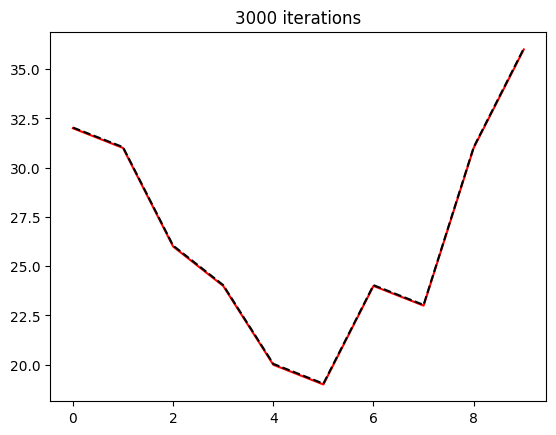

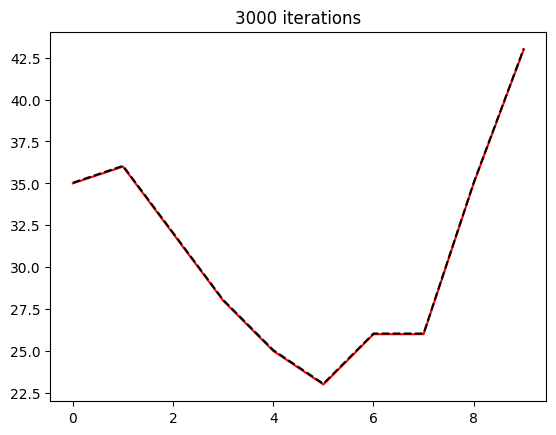

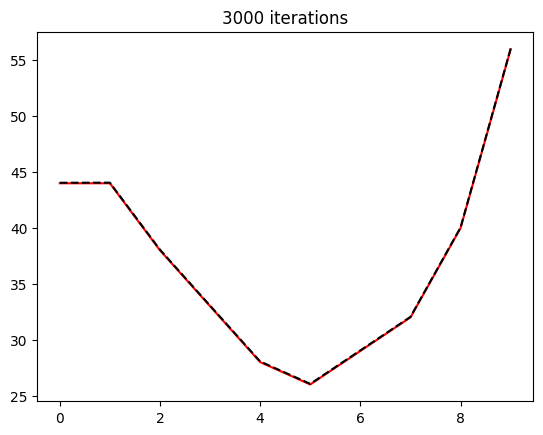

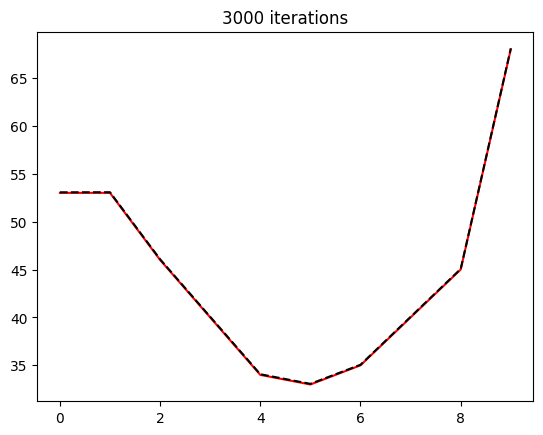

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
for i in range(target.shape[0]):
  plt.plot(target[i,:],color="red")
  plt.plot(predictions.numpy()[i,:],"k--")
  plt.title(f"{num_epochs} iterations")
  plt.figure()

NameError: ignored

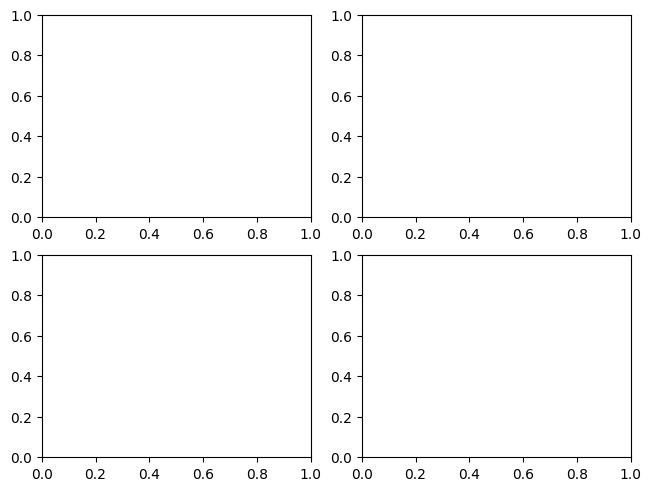

In [ ]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,layout='constrained')
vars = [ax1,ax2,ax3,ax4]
for i in range(target.shape[0]):
  vars[i].plot(idx[i+1,:],target[i,:],color="black",lw=3,label="Target")
  vars[i].plot(idx[i+1,:],predictions.numpy()[i,:],"r--",label="Prediction")
  vars[i].legend()
  vars[i].set_title(f'Subsequence {i+1}')
# fig.suptitle("Target vs Predictions")